Importing required libraries

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

Reading dataset

In [95]:
data = pd.read_csv('train.csv')
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [97]:
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Calculating missing values

In [98]:
missing_data = data.isnull().mean()*100
missing_data = missing_data[missing_data>0]

print(missing_data)

Arrival Delay in Minutes    0.298352
dtype: float64


In [99]:
data.interpolate(method='linear', inplace=True)

Knowing variables with zero variance

In [100]:
zero_var_col = []

for col in data:
    if(data[col].nunique() <=1):
        zero_var_col.append(col)

print(zero_var_col)

df = data.drop(zero_var_col, axis=1)

[]


Sepearating Categorical and Numerical columns

In [101]:
cat = df.select_dtypes(exclude=[np.number]).columns.tolist()
print('Categorical : ', cat)
num = df.select_dtypes(include=[np.number]).columns.tolist()
print('Numerical : ', num)

Categorical :  ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
Numerical :  ['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


In [102]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

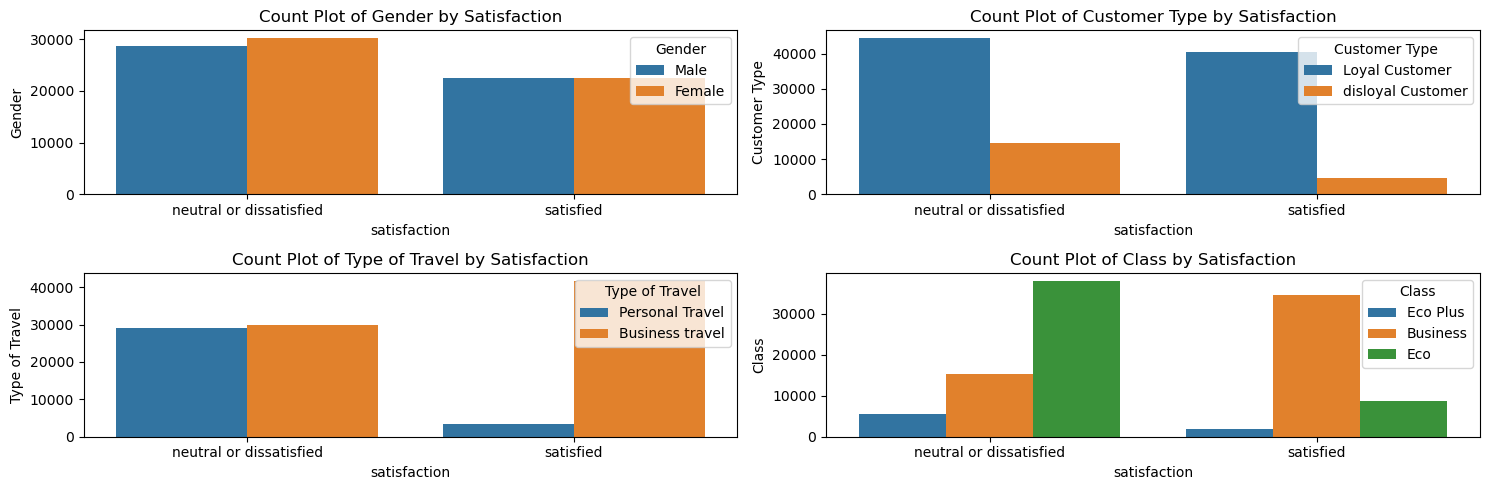

In [103]:
columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

# Create subplots
fig, axes = plt.subplots(2,2,figsize=(15, 5))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(columns):
    sns.countplot(x='satisfaction', hue=col, data=df, ax=axes[i])
    axes[i].set_xlabel('satisfaction')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'Count Plot of {col} by Satisfaction')

# Adjust layout
plt.tight_layout()
plt.show()

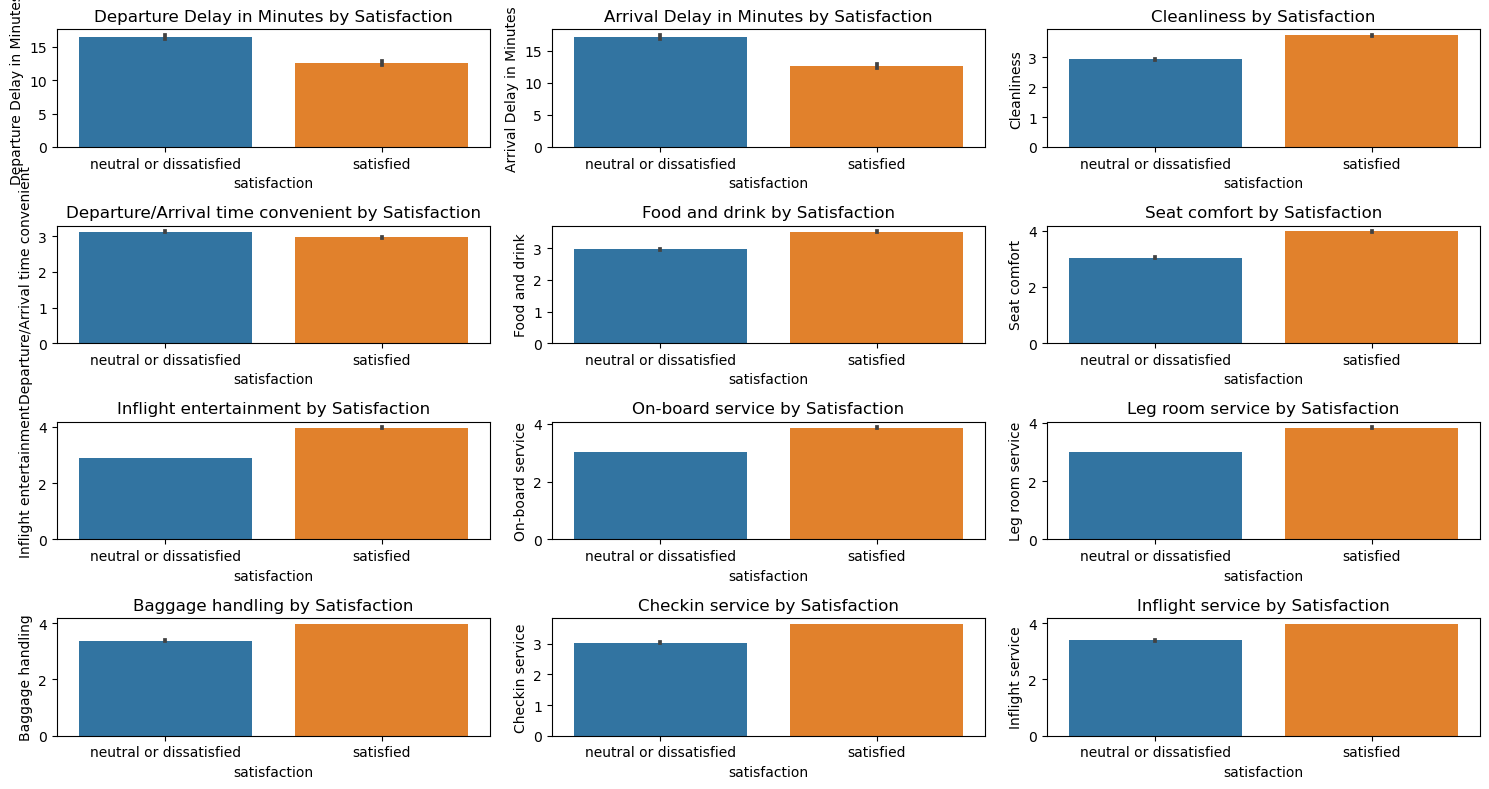

In [104]:
columns = ['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Cleanliness', 'Departure/Arrival time convenient', 'Food and drink',  'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service']
# Create subplots
fig, axes = plt.subplots(4,3,figsize=(15, 8))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(columns):
    sns.barplot(x='satisfaction', y=col, data=df, ax=axes[i])
    axes[i].set_xlabel('satisfaction')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} by Satisfaction')

# Adjust layout
plt.tight_layout()
plt.show()

Relation between customer type and age with respect to satisfaction

<Axes: xlabel='Customer Type', ylabel='Age'>

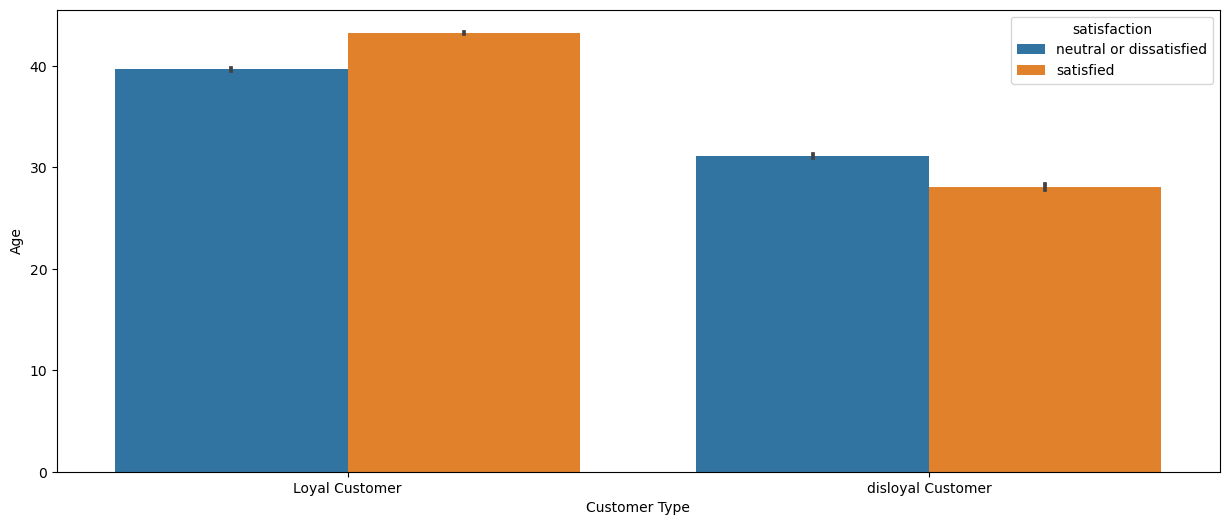

In [105]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Customer Type'],y=df['Age'], hue=df['satisfaction'])

Piechart for loyal and disloyal customers

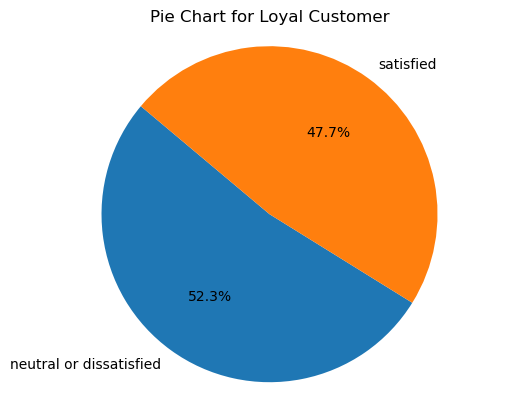

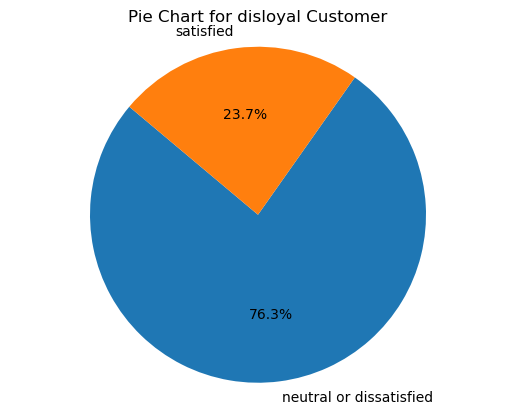

In [106]:
pie_cat = df['Customer Type'].unique()


for category in pie_cat:
    data_subset = df[df['Customer Type'] == category]
    category_counts = data_subset['satisfaction'].value_counts()
    
 
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie Chart for {category}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

Flight distance metrics with respect to various variables

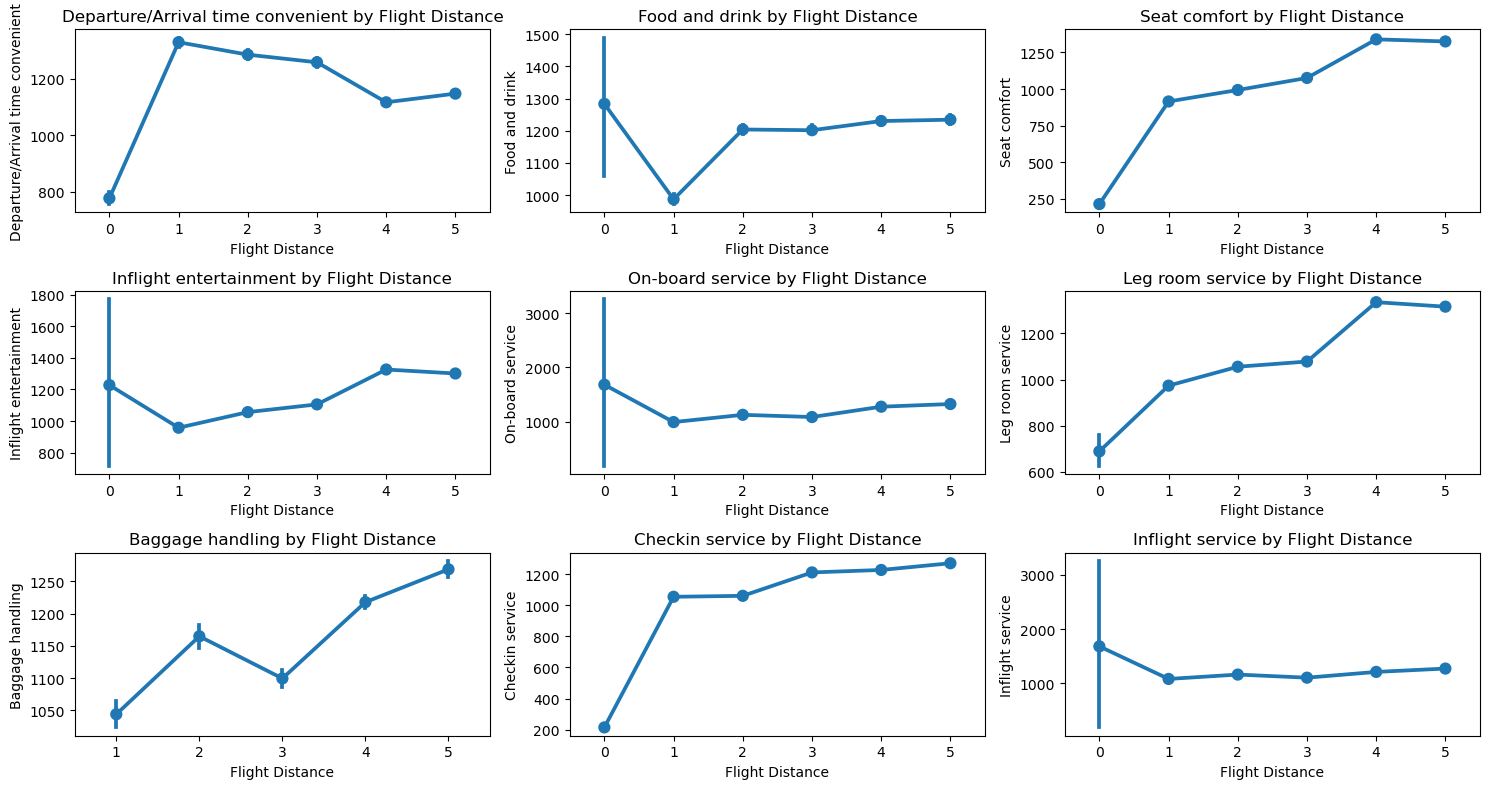

In [114]:
columns = ['Departure/Arrival time convenient', 'Food and drink',  'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service']
# Create subplots
fig, axes = plt.subplots(3,3,figsize=(15, 8))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(columns):
    sns.pointplot(y='Flight Distance', x=col, data=df, ax=axes[i])
    axes[i].set_xlabel('Flight Distance')
    axes[i].set_ylabel(col)
    axes[i].set_title(f'{col} by Flight Distance')

# Adjust layout
plt.tight_layout()
plt.show()

Relation between departure and arrival delay

<Axes: xlabel='Departure Delay in Minutes', ylabel='Arrival Delay in Minutes'>

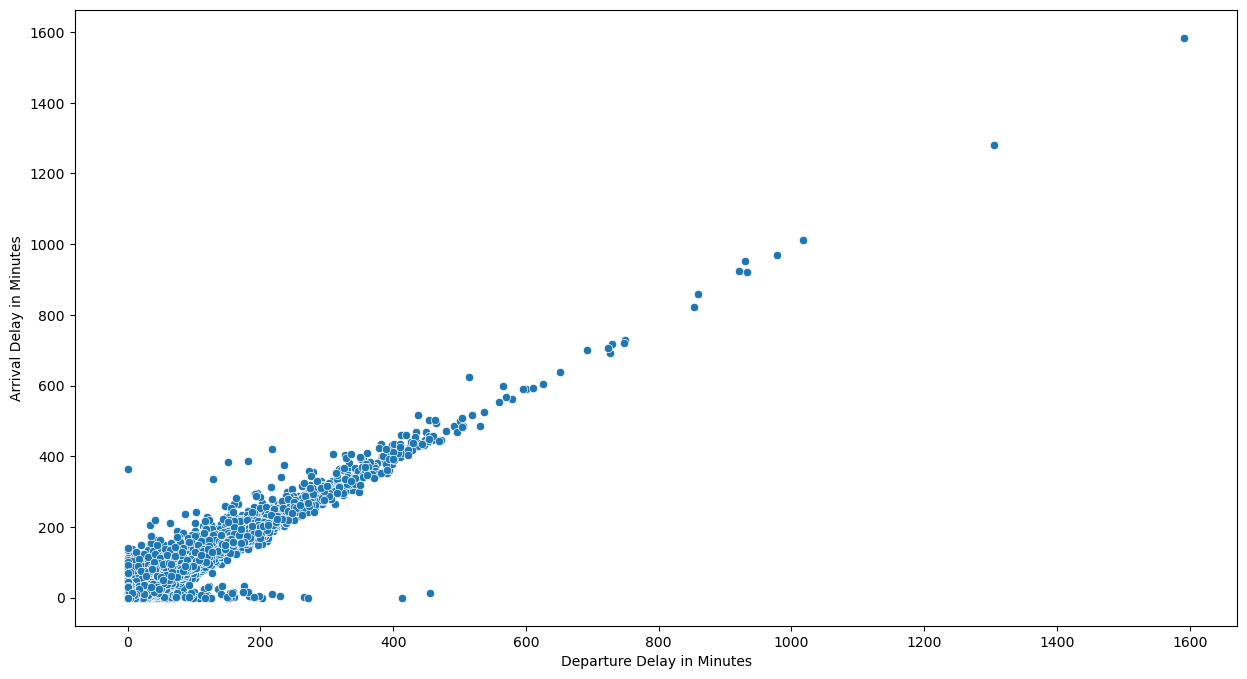

In [121]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Departure Delay in Minutes'], y=df['Arrival Delay in Minutes'])

Relation between arrival and departure with time convinient

<Axes: xlabel='Departure/Arrival time convenient', ylabel='Departure Delay in Minutes'>

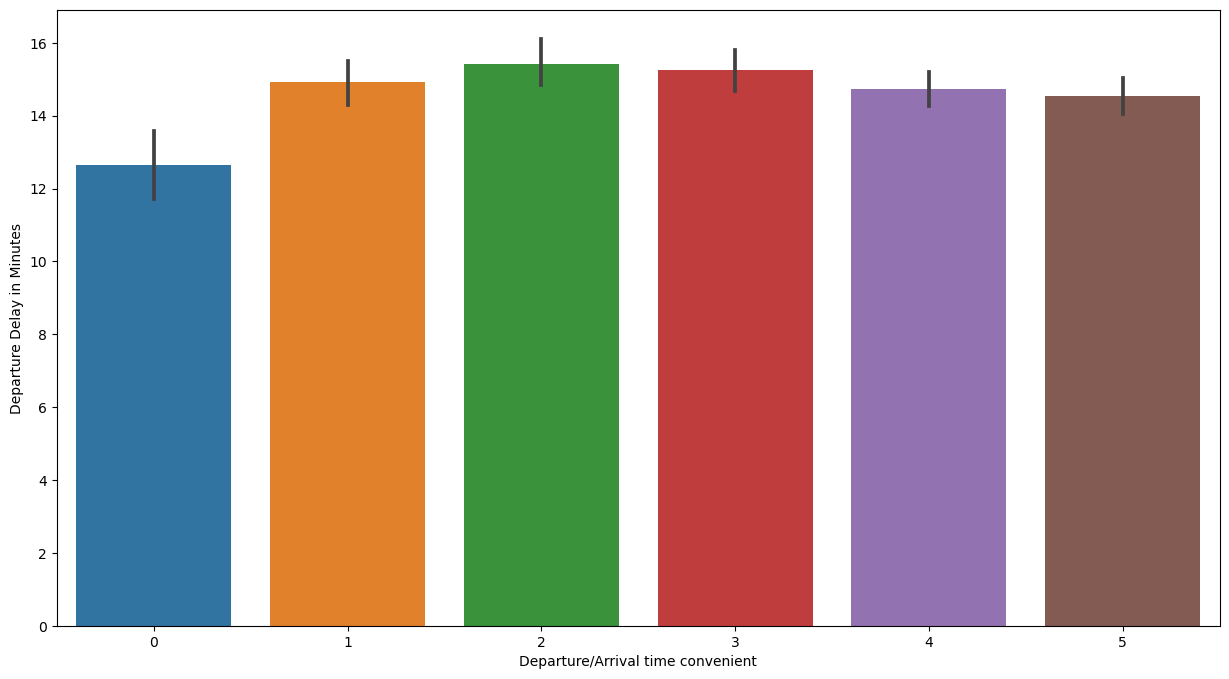

In [140]:
plt.figure(figsize=(15,8))
sns.barplot(y=df['Departure Delay in Minutes'], x=df['Departure/Arrival time convenient'])


<Axes: xlabel='Departure/Arrival time convenient', ylabel='Arrival Delay in Minutes'>

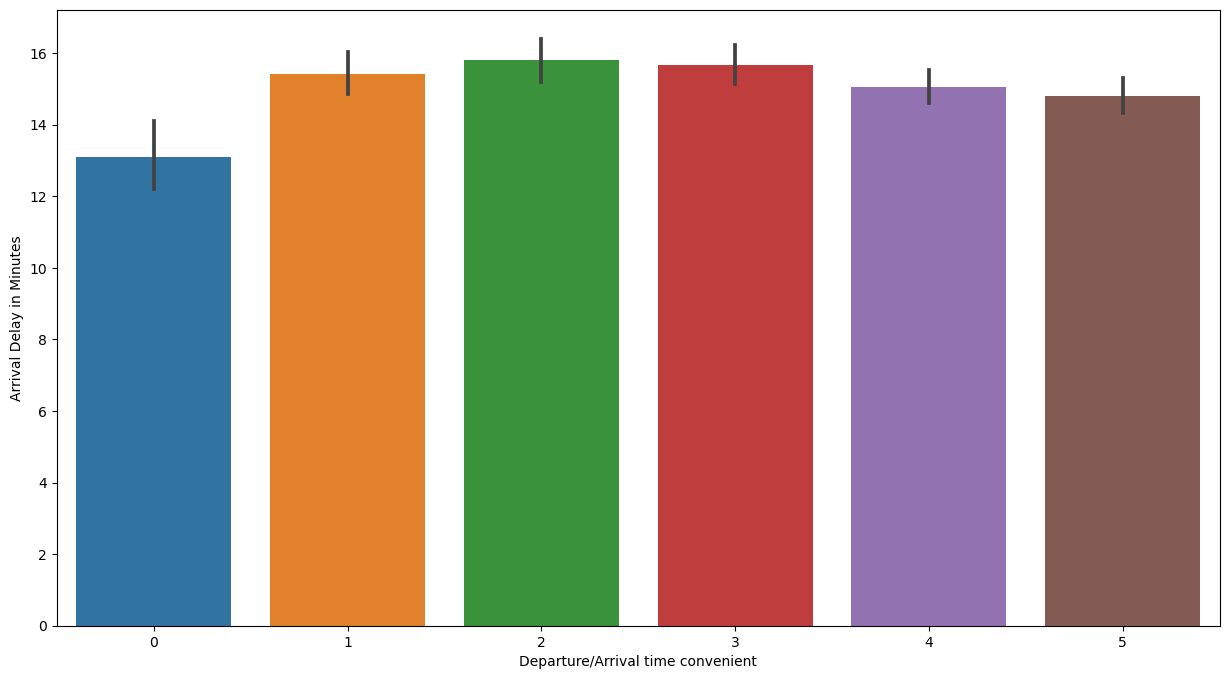

In [145]:
plt.figure(figsize=(15,8))
sns.barplot(y=df['Arrival Delay in Minutes'], x=df['Departure/Arrival time convenient'])

Cleanliness of each class

<Axes: xlabel='Class', ylabel='Cleanliness'>

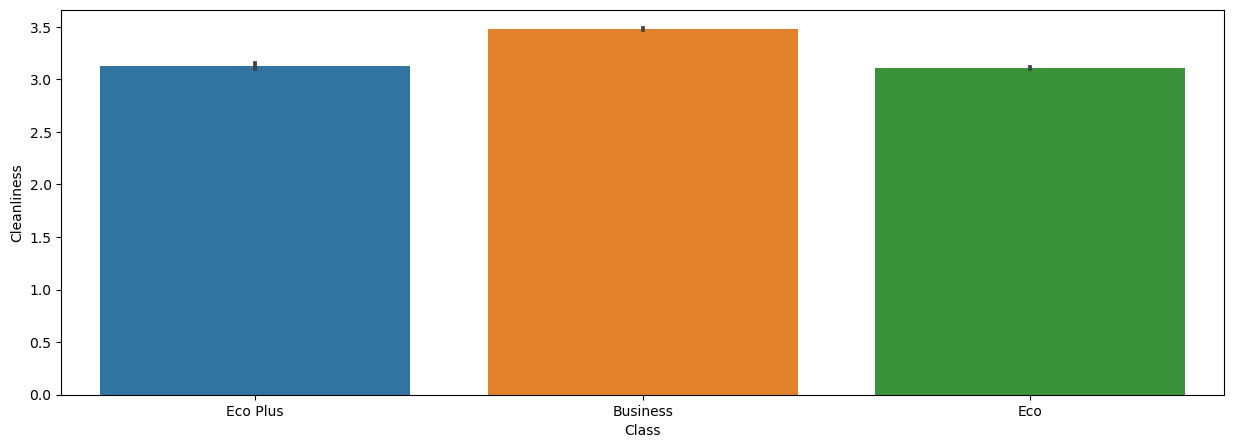

In [148]:
plt.figure(figsize=(15,5))
sns.barplot(y=df['Cleanliness'], x=df['Class'])

Outliers

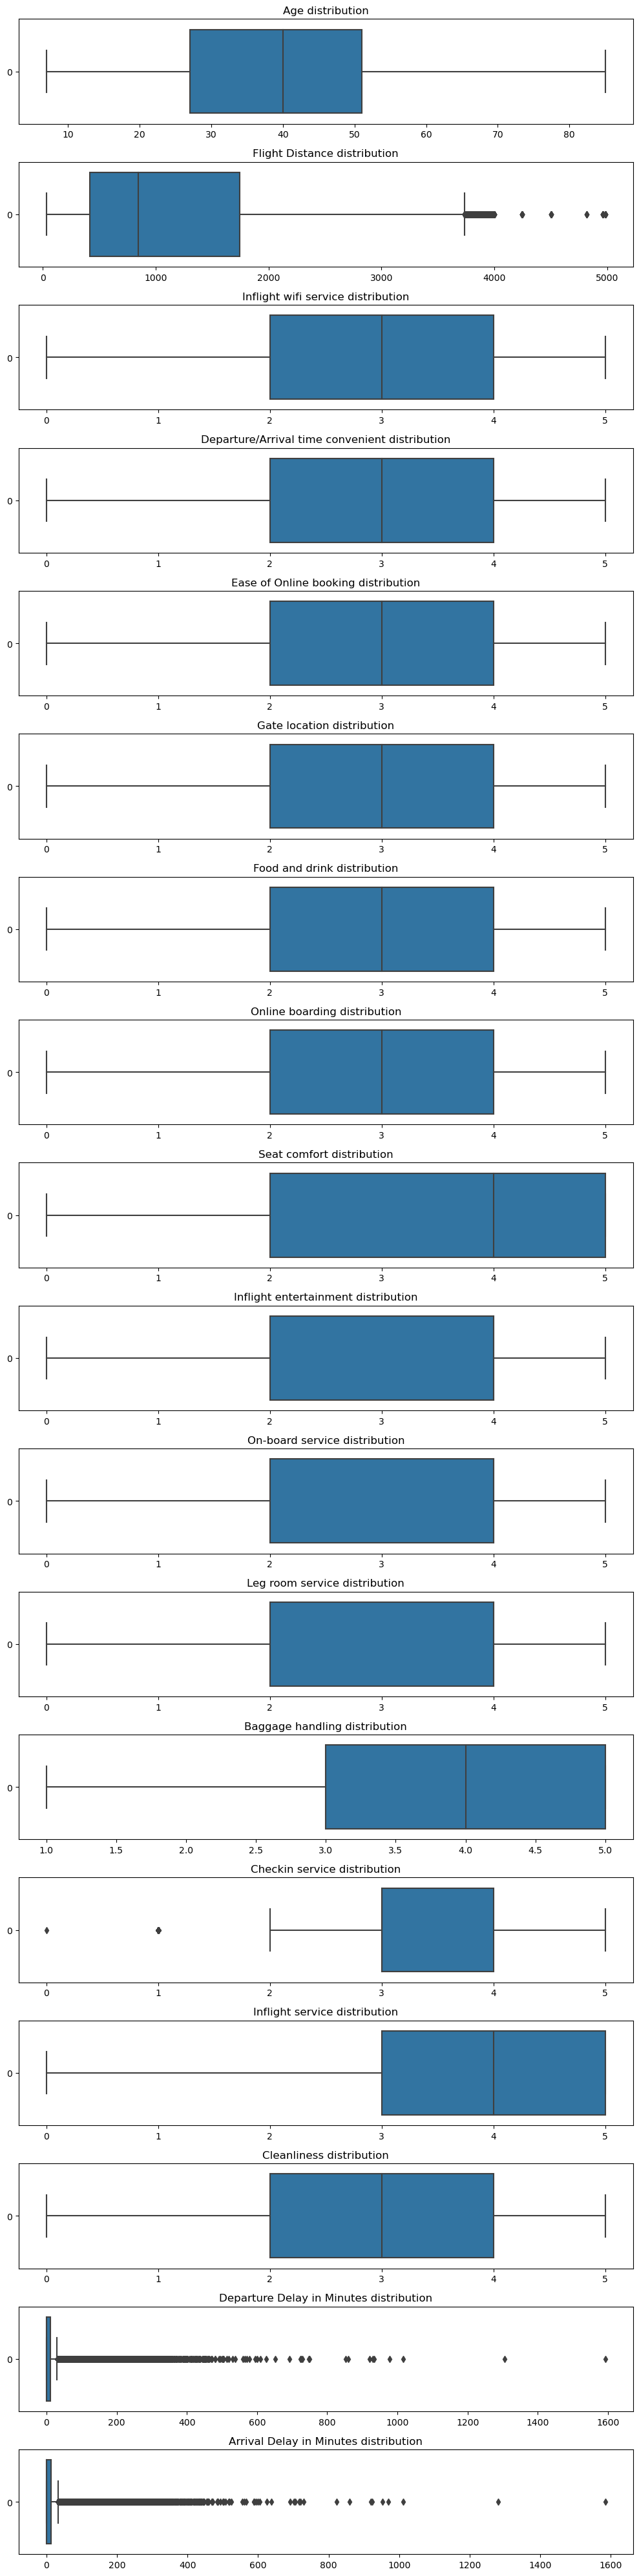

In [150]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.to_list()

# Create subplots
fig, axes = plt.subplots(len(numerical_columns),1, figsize=(10,40))
axes = axes.flatten()  # Flatten the array of axes for easier iteration

# Iterate over numerical columns and create bar plots
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df[col], ax=axes[i], orient='h')
    axes[i].set_title(f'{col} distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [154]:
def remove_outliers(df, conditions, tot_row):
    df1 = df
    del_row = 0
    data_loss = 0
    for cond in conditions:
        tot = df.shape[0]
        df = df[cond]
        del_row = del_row + (tot - df.shape[0])

    print(f'deleted rows : {del_row} out of {tot_row}')
    data_loss = (del_row/tot_row * 100)
    print(f'data lost : {data_loss}')
    print(df.shape[0])
    
    if(data_loss<8):
        print('Data loss is minimum, so outliers deleted')
        return df
    else:
        print('Data loss is significant, so outliers are not deleted and needs treatment')
        return df1


In [155]:
condition_list = (df['Flight Distance']<4500, df['Departure Delay in Minutes']<1200, df['Arrival Delay in Minutes']<1200, df['Inflight service']>1)
df1 =df
df1 = remove_outliers(df1, condition_list, df1.shape[0])


deleted rows : 7125 out of 103904
data lost : 6.857291345857715
96779
Data loss is minimum, so outliers deleted


Correlation Matrix

<Axes: >

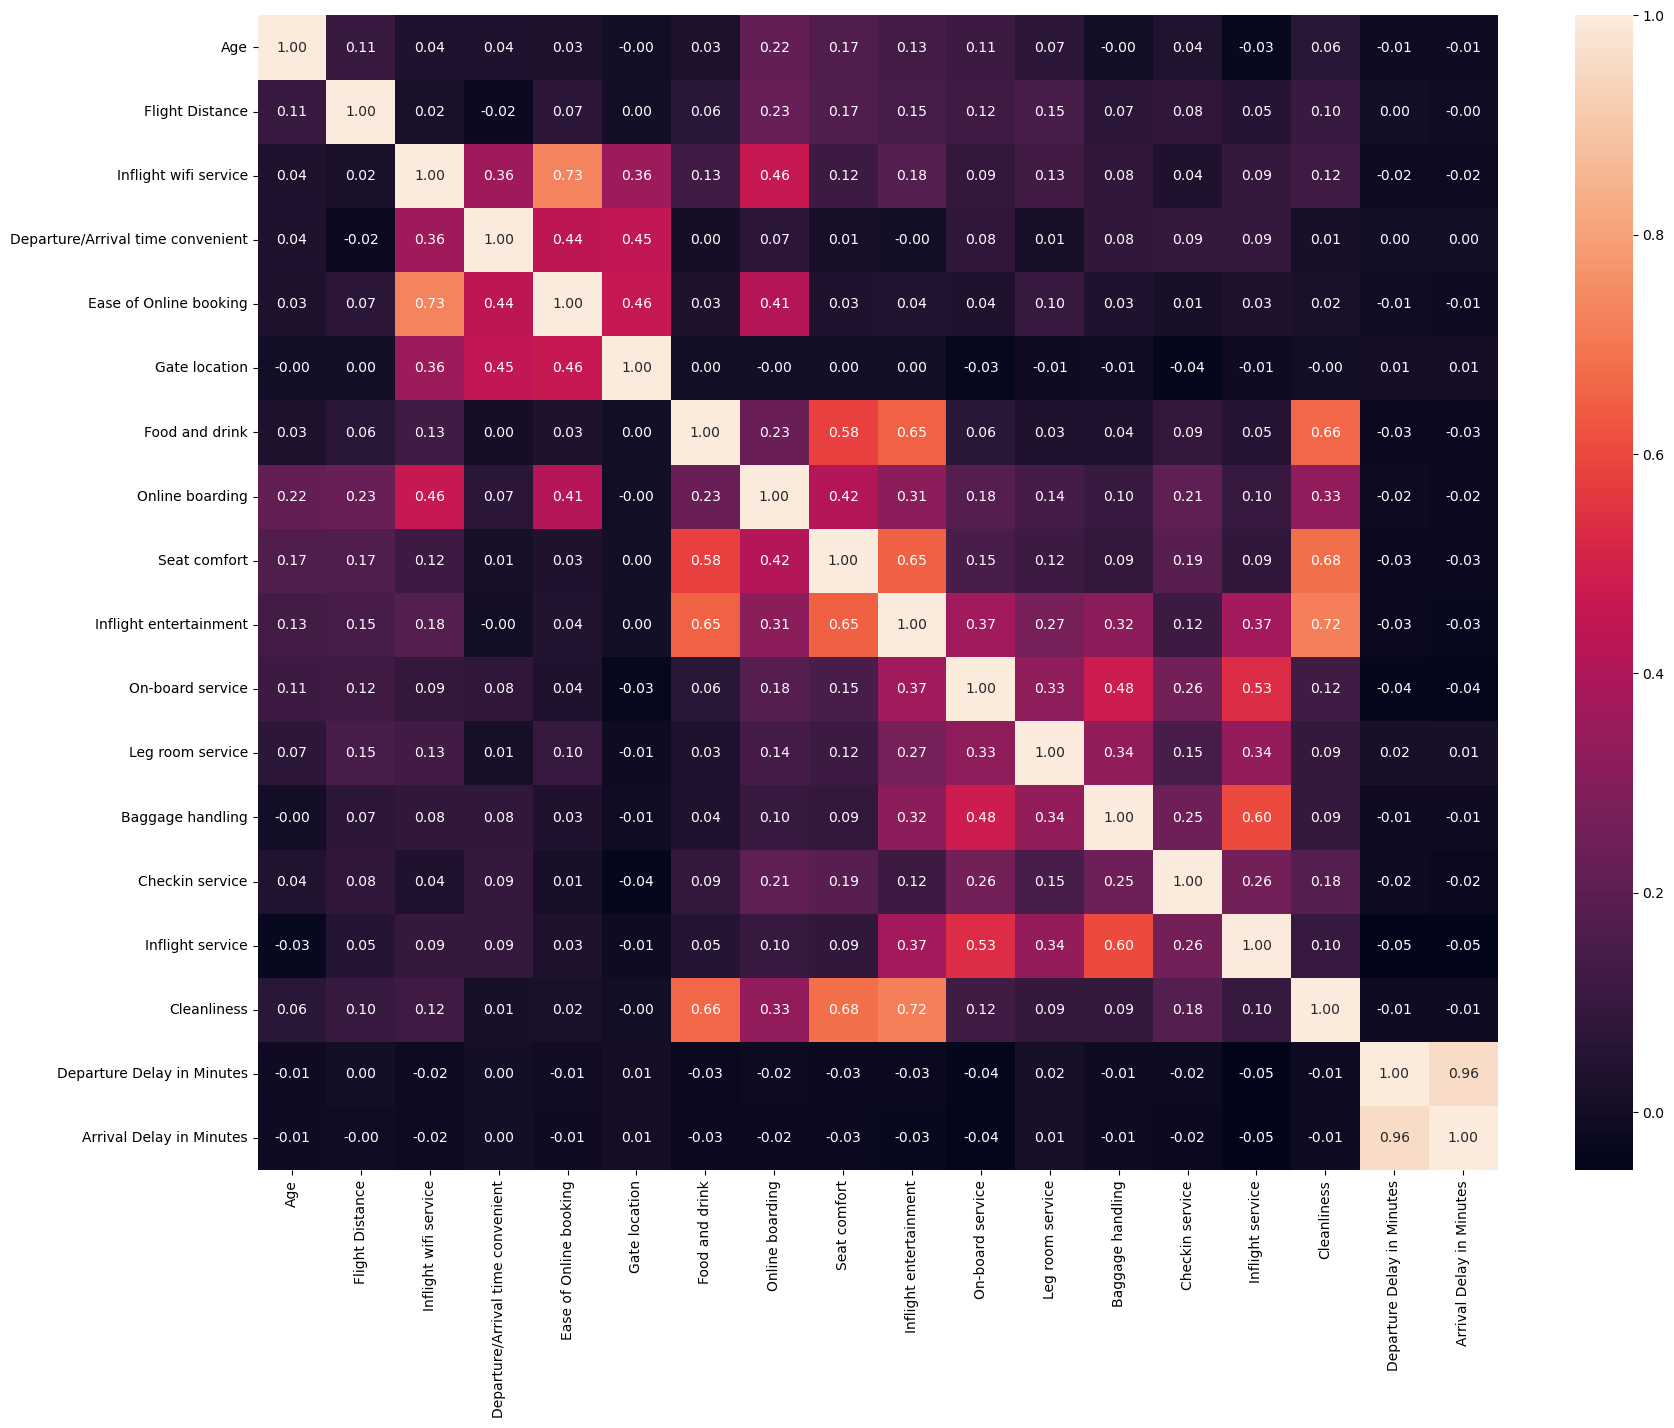

In [156]:
plt.figure(figsize=[20,15])
sns.heatmap(data= df1.select_dtypes(include=[np.number]).corr(), annot = True, fmt = '.2f')

In [157]:
%pip install feature.engine

Note: you may need to restart the kernel to use updated packages.


In [158]:
from feature_engine.selection import DropCorrelatedFeatures

tr = DropCorrelatedFeatures(variables= None, method='pearson', threshold=0.75)

uncorrelated_data = tr.fit_transform(df1.select_dtypes(include=[np.number]))

print(tr.correlated_feature_sets_)

print(tr.features_to_drop_)

uncorrelated_data.head()

[{'Departure Delay in Minutes', 'Arrival Delay in Minutes'}]
{'Arrival Delay in Minutes'}


,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0


Encoding Categorical Data

In [165]:
cats = df1.select_dtypes(exclude=[np.number])
cats.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied


In [166]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each categorical column and perform label encoding
for column in cats.columns:
    # Fit label encoder and transform the categorical column
    cats[column] = label_encoder.fit_transform(cats[column])

cats.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,1,0,1,2,0
1,1,1,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,1,0,0,0,1


Merging Categorical and Numerical columns

In [167]:
df1 = pd.concat([uncorrelated_data, cats], axis=1)
df1.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,...,4,4,5,5,25,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,...,3,1,4,1,1,1,1,0,0,0
2,26,1142,2,2,2,2,5,5,5,5,...,4,4,4,5,0,0,0,0,0,1
3,25,562,2,5,5,5,2,2,2,2,...,3,1,4,2,11,0,0,0,0,0
4,61,214,3,3,3,3,4,5,5,3,...,4,3,3,3,0,1,0,0,0,1
